In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trained-model/my_pre-trained_model (1).h5
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD603_left_0_5670.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD514_right_0_407.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD315_right_0_8503.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD514_right_0_5032.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD464_left_0_5008.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD514_right_0_2993.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD603_left_0_5376.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD514_right_0_1516.jpeg
/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/2.Wet AMD/Wet AMD514_right_0_4235.jpeg
/kaggle/input/retinal-fundus-images/Ret

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import os

2024-07-28 07:39:58.221679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 07:39:58.221804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 07:39:58.344298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:


base_dir = '/kaggle/input/retinal-fundus-images/Retinal Fundus Images'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['val', 'test', 'train']

Contents of train directory:
['2.Wet AMD', '3.Mild DR', '8.Hypertensive Retinopathy', '11.Normal Fundus', '10.Glaucoma', '5.Severe DR', '6.Proliferate DR', '7.Cataract', '4.Moderate DR', '9.Pathological Myopia', '1.Dry AMD']

Contents of validation directory:
['2.Wet AMD', '3.Mild DR', '8.Hypertensive Retinopathy', '11.Normal Fundus', '10.Glaucoma', '5.Severe DR', '6.Proliferate DR', '7.Cataract', '4.Moderate DR', '9.Pathological Myopia', '1.Dry AMD']


In [5]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

X_data = []
Y_data = []
image_size = 150
labels = ['1.Dry AMD','2.Wet AMD', '3.Mild DR', '4.Moderate DR', '5.Severe DR', '6.Proliferate DR','7.Cataract','8.Hypertensive Retinopathy','9.Pathological Myopia','10.Glaucoma', '11.Normal Fundus']

# Process training images
for label in labels:
    folder_path = os.path.join('/kaggle/input/retinal-fundus-images/Retinal Fundus Images/train', label)
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X_data.append(img)
                Y_data.append(label)
            else:
                print(f"Error reading image {file_name} in {folder_path}")
    else:
        print(f"Directory {folder_path} does not exist")

# Process test images
for label in labels:
    folder_path = os.path.join('/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test', label)
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X_data.append(img)
                Y_data.append(label)
            else:
                print(f"Error reading image {file_name} in {folder_path}")
    else:
        print(f"Directory {folder_path} does not exist")

X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=101)

# Convert labels to integer indices
y_train_new = [labels.index(i) for i in y_train]
y_test_new = [labels.index(i) for i in y_test]

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=len(labels))
Y_test = tf.keras.utils.to_categorical(y_test_new, num_classes=len(labels))


In [6]:

# Define the paths
test_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test"
train_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/train"

# Count the number of files in each directory
num_test_files = len(os.listdir(test_path))
num_train_files = len(os.listdir(train_path))

# Print the counts
print(f"Number of test files: {num_test_files}")
print(f"Number of train files: {num_train_files}")


Number of test files: 11
Number of train files: 11


In [7]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(11, activation='softmax')(x)


In [9]:
model = Model(inputs=base_model.input, outputs=predictions)


In [10]:
for layer in base_model.layers:
    layer.trainable = False


In [11]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 23,120,171 (88.20 MB)

 Trainable params: 1,317,387 (5.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(labels), activation='softmax')) 
# Assuming you have 8 classes


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,450,635 (16.98 MB)

 Trainable params: 4,450,635 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.1)


Epoch 1/50
  1/540 ━━━━━━━━━━━━━━━━━━━━ 4:23:01 29s/step - accuracy: 0.0625 - loss: 12.6861

I0000 00:00:1722152672.438358      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722152672.462291      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2531 - loss: 2.6919

W0000 00:00:1722152726.134094      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722152727.260233      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


540/540 ━━━━━━━━━━━━━━━━━━━━ 92s 116ms/step - accuracy: 0.2532 - loss: 2.6907 - val_accuracy: 0.4924 - val_loss: 1.2952
Epoch 2/50


W0000 00:00:1722152734.936750      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


540/540 ━━━━━━━━━━━━━━━━━━━━ 92s 71ms/step - accuracy: 0.5168 - loss: 1.2488 - val_accuracy: 0.5993 - val_loss: 1.0366
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.6160 - loss: 1.0129 - val_accuracy: 0.6279 - val_loss: 0.8936
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.6413 - loss: 0.8919 - val_accuracy: 0.6113 - val_loss: 0.9059
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.6559 - loss: 0.8402 - val_accuracy: 0.6357 - val_loss: 0.8536
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.6710 - loss: 0.7981 - val_accuracy: 0.6514 - val_loss: 0.8344
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.6801 - loss: 0.7724 - val_accuracy: 0.6285 - val_loss: 0.8863
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.6840 - loss: 0.7575 - val_accuracy: 0.6618 - val_loss: 0.7652
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.6926 - loss: 0.7279 - val_accurac

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


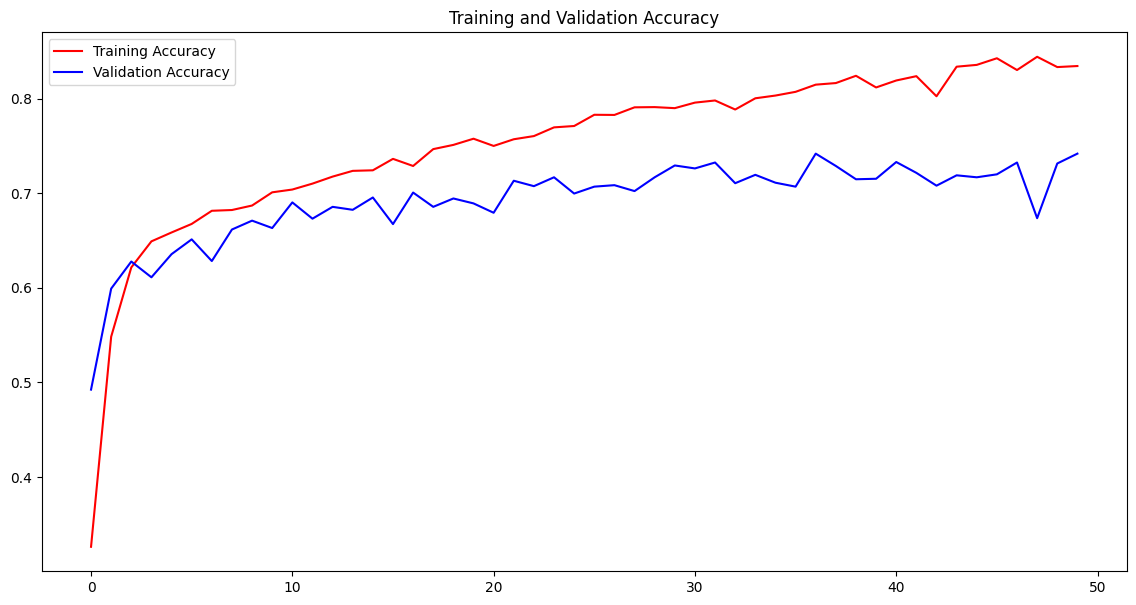

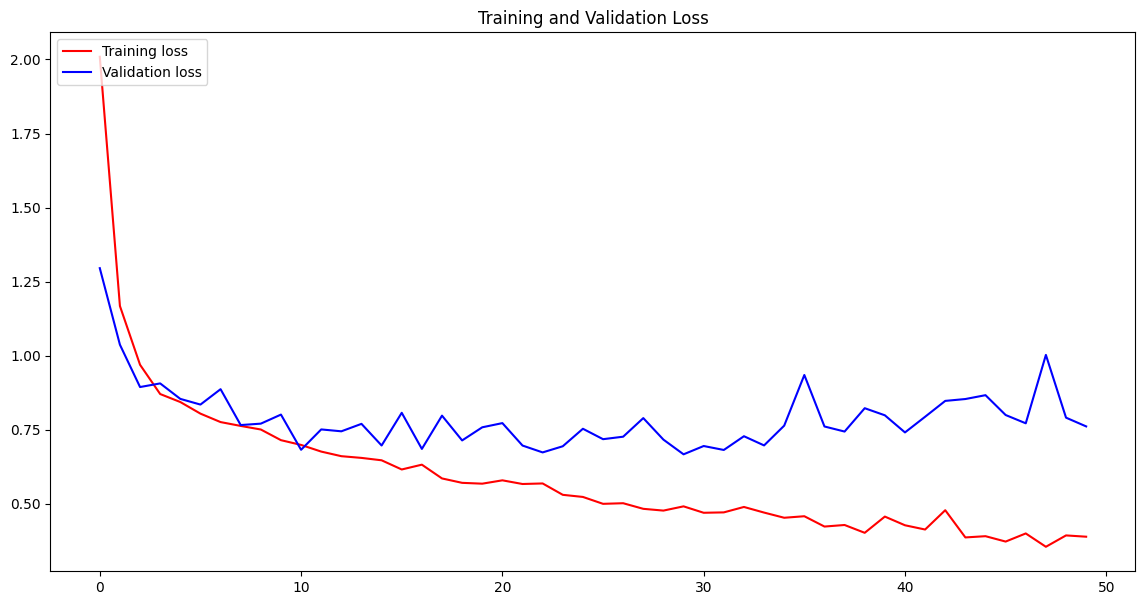

Overall test accuracy: 75.52%


W0000 00:00:1722154610.661886      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_loss))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')
plt.show()

# Print overall test accuracy
accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Overall test accuracy: {accuracy * 100:.2f}%")


In [18]:
import cv2
import numpy as np

# Define the path to the image
image_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test/11.Normal Fundus/4059_left.jpeg"

# Try to read the image
img = cv2.imread(image_path)

# Check if the image was read correctly
if img is None:
    print(f"Error reading image at {image_path}. Please check the file path and integrity.")
else:
    # Resize the image
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print(f"Image shape: {img_array.shape}")


Image shape: (150, 150, 3)


In [19]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

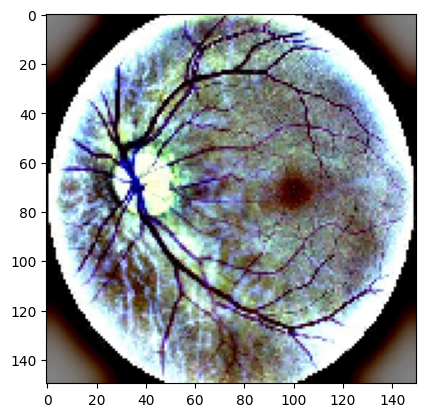

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image from file
img_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test/11.Normal Fundus/4059_left.jpeg"
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Display the image
plt.imshow(img_array.astype('uint8'))
plt.axis('on')
plt.show()

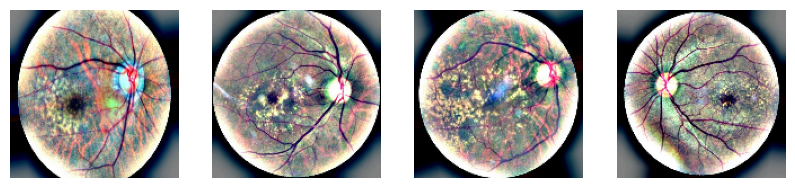

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_data[i], cmap="gray")
    plt.axis('off')
plt.show()

 7/67 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

W0000 00:00:1722154645.558024      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


W0000 00:00:1722154647.254508      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


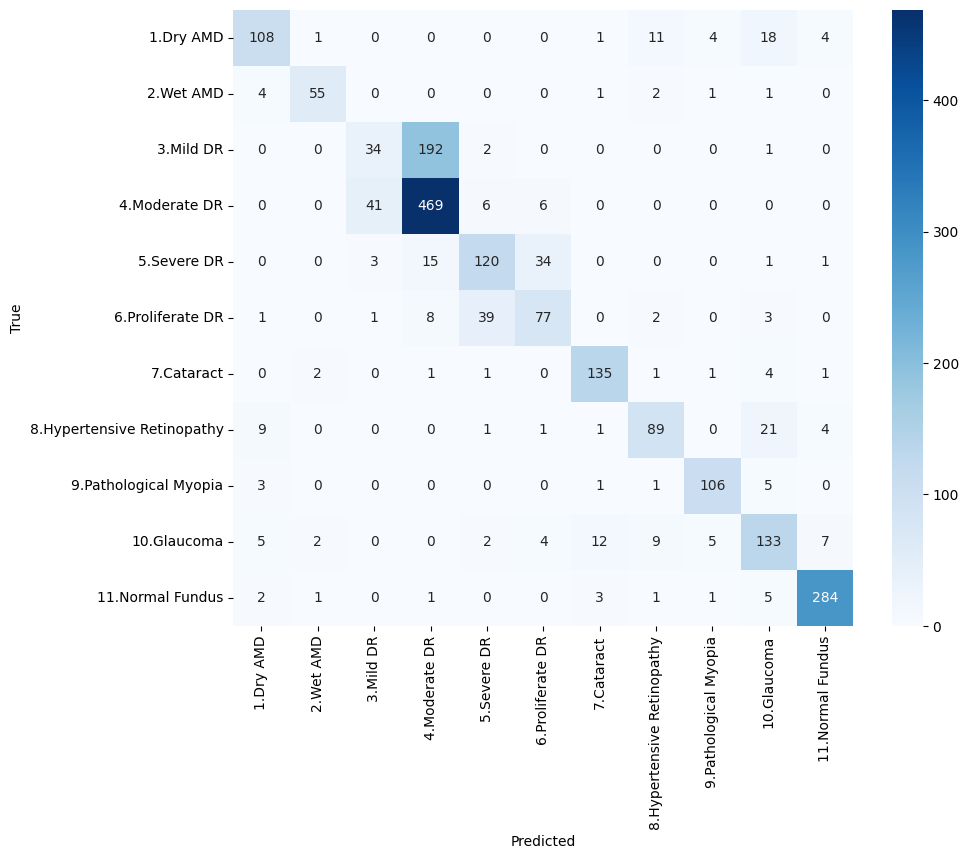

                            precision    recall  f1-score   support

                 1.Dry AMD       0.82      0.73      0.77       147
                 2.Wet AMD       0.90      0.86      0.88        64
                 3.Mild DR       0.43      0.15      0.22       229
             4.Moderate DR       0.68      0.90      0.78       522
               5.Severe DR       0.70      0.69      0.70       174
          6.Proliferate DR       0.63      0.59      0.61       131
                7.Cataract       0.88      0.92      0.90       146
8.Hypertensive Retinopathy       0.77      0.71      0.74       126
     9.Pathological Myopia       0.90      0.91      0.91       116
               10.Glaucoma       0.69      0.74      0.72       179
          11.Normal Fundus       0.94      0.95      0.95       298

                  accuracy                           0.76      2132
                 macro avg       0.76      0.74      0.74      2132
              weighted avg       0.74      0.7

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(Y_test, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=labels))


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


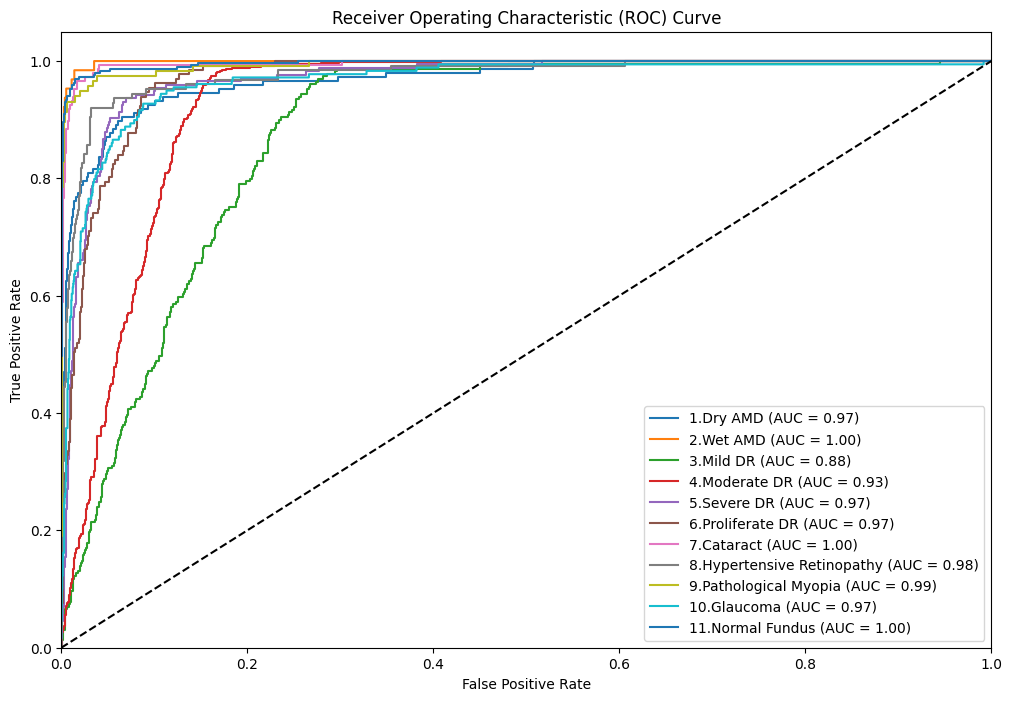

In [23]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Assume the model has already been trained and evaluated

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [24]:
model.save('/kaggle/working/my_pre-training_model.h5')


In [25]:
import os

# List files in the working directory
print(os.listdir('/kaggle/working/'))


['my_pre-training_model.h5', '__notebook__.ipynb']


In [26]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model('/kaggle/input/trained-model/my_pre-trained_model (1).h5')

# Print the model summary to verify
loaded_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)             │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,449,098 (16.97 MB)

 Trainable params: 4,449,096 (16.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
# Assuming you have loaded your dataset
from collections import Counter

print("Class distribution in training set:")
print(Counter(y_train))

print("Class distribution in test set:")
print(Counter(y_test))


Class distribution in training set:
Counter({'4.Moderate DR': 4676, '11.Normal Fundus': 2522, '3.Mild DR': 2167, '10.Glaucoma': 1655, '5.Severe DR': 1568, '7.Cataract': 1335, '6.Proliferate DR': 1255, '8.Hypertensive Retinopathy': 1188, '1.Dry AMD': 1183, '9.Pathological Myopia': 1128, '2.Wet AMD': 504})
Class distribution in test set:
Counter({'4.Moderate DR': 522, '11.Normal Fundus': 298, '3.Mild DR': 229, '10.Glaucoma': 179, '5.Severe DR': 174, '1.Dry AMD': 147, '7.Cataract': 146, '6.Proliferate DR': 131, '8.Hypertensive Retinopathy': 126, '9.Pathological Myopia': 116, '2.Wet AMD': 64})


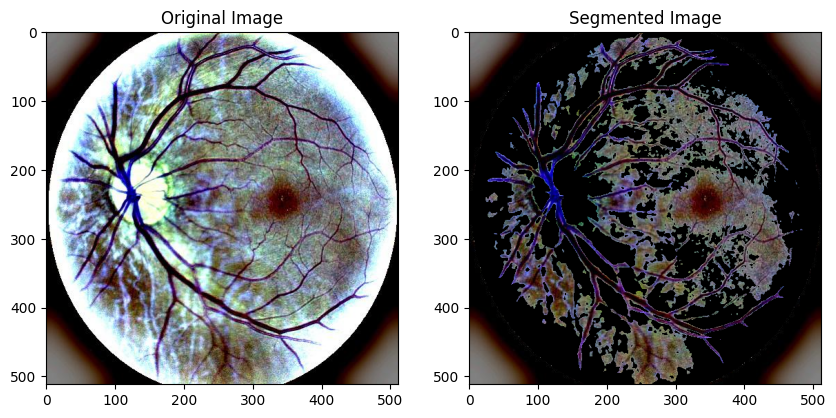

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
               Disease_Name         %
0                 Severe DR  0.300864
1                   Wet AMD  0.273587
2               Moderate DR  0.176198
3                   Mild DR  0.141610
4             Normal Fundus  0.049895
5            Proliferate DR  0.032314
6                   Dry AMD  0.017063
7  Hypertensive Retinopathy  0.008469
Heart Disease Status: Normal


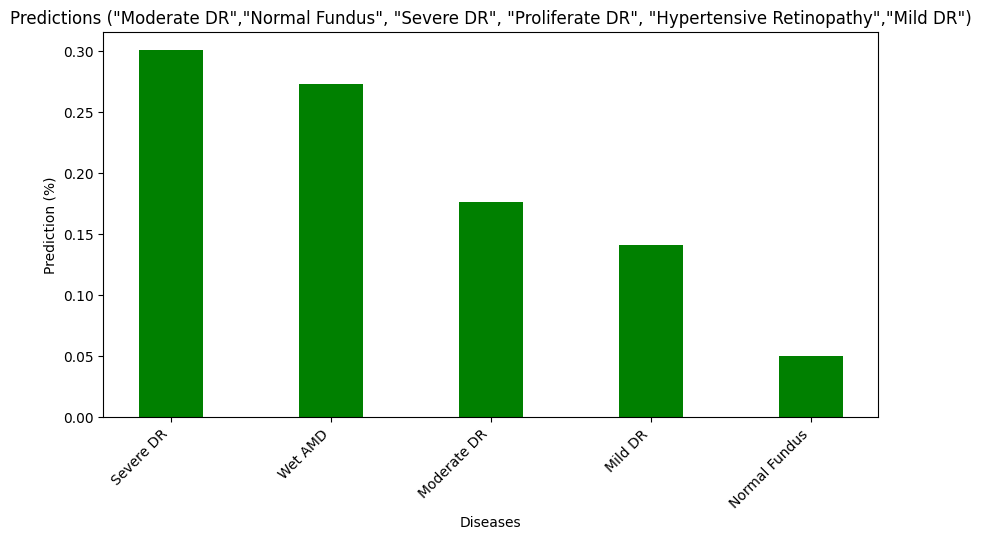

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.tree import DecisionTreeClassifier

# Define a function to segment the image
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    segmented = cv2.bitwise_and(image, mask)
    return segmented

# Define a function to preprocess a single image
def preprocess_image(image):
    image = cv2.resize(image, (150, 150))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image



# Path to the image
image_path = '/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test/11.Normal Fundus/4059_left.jpeg'

# Read and segment the image
image = cv2.imread(image_path)
segmented_image = segment_image(image)

# Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.show()

# Preprocess the segmented image
preprocessed_image = preprocess_image(segmented_image)

# Make predictions
images = np.vstack([preprocessed_image])
prediction_array = loaded_model.predict(images, batch_size=10)[0]

# Define the classes
classes = ["Dry AMD", "Normal Fundus", "Wet AMD", "Mild DR", "Moderate DR", "Severe DR", "Proliferate DR", "Hypertensive Retinopathy"]

# Get results
def get_results(classes, prediction_array):
    results = []
    for i, j in zip(classes, prediction_array):
        results.append([i, float(j)])
    results = sorted(results, key=lambda result: result[1], reverse=True)
    return results

results = get_results(classes, prediction_array)

# Save results to CSV
header = ['Disease_Name', '%']
with open('results.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for result in results:
        writer.writerow(result)

# Read results from CSV and print
df = pd.read_csv('results.csv')
print(df)

# Extract values for Dry AMD and Wet AMD
dry_amd = prediction_array[classes.index("Dry AMD")]
wet_amd = prediction_array[classes.index("Wet AMD")]

# Determine heart disease status using a decision tree
# Create some dummy data for training the decision tree
X_train = np.array([[15, 30], [5, 10], [20, 40], [10, 20], [25, 50]])
y_train = np.array([0, 0, 1, 0, 1])  # 0 = No heart disease, 1 = Heart disease

# Train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict heart disease status based on threshold (example: <20% means no heart disease)
heart_disease_status = clf.predict([[dry_amd, wet_amd]])[0]
heart_disease_status_text = "Normal" if heart_disease_status == 0 else "Heart Disease"
print(f"Heart Disease Status: {heart_disease_status_text}")

# Plot the top 5 predictions
fig = plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in results[:5]], [i[1] for i in results[:5]], color='green', width=0.4)
plt.xlabel("Diseases")
plt.ylabel("Prediction (%)")
plt.title("Predictions (\"Moderate DR\",\"Normal Fundus\", \"Severe DR\", \"Proliferate DR\", \"Hypertensive Retinopathy\",\"Mild DR\")")
plt.xticks(rotation=45, ha='right')
plt.show()



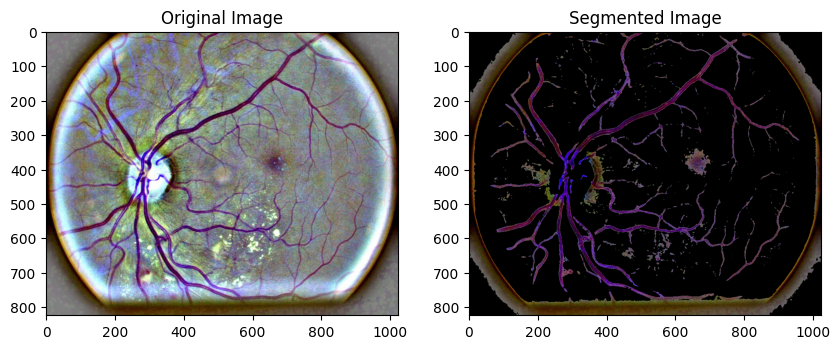

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
               Disease_Name         %
0                 Severe DR  0.272538
1                   Wet AMD  0.243783
2               Moderate DR  0.207195
3                   Mild DR  0.161983
4             Normal Fundus  0.046416
5            Proliferate DR  0.037911
6                   Dry AMD  0.020369
7  Hypertensive Retinopathy  0.009804
Heart Disease Status: Normal


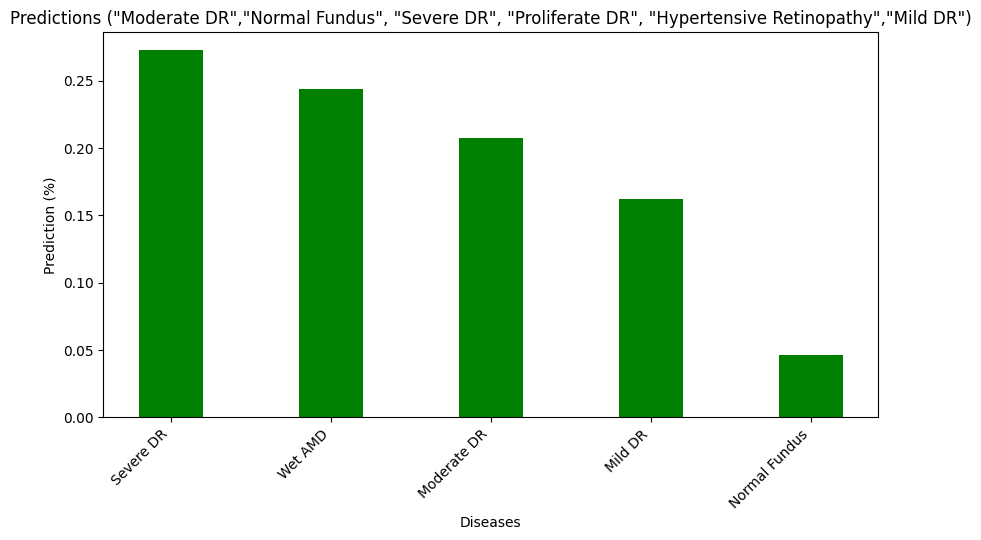

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.tree import DecisionTreeClassifier

# Define a function to segment the image
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    segmented = cv2.bitwise_and(image, mask)
    return segmented

# Define a function to preprocess a single image
def preprocess_image(image):
    image = cv2.resize(image, (150, 150))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image



# Path to the image
image_path = '/kaggle/input/retinal-fundus-images/Retinal Fundus Images/val/4.Moderate DR/1614_right.jpeg'
# Read and segment the image
image = cv2.imread(image_path)
segmented_image = segment_image(image)

# Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.show()

# Preprocess the segmented image
preprocessed_image = preprocess_image(segmented_image)

# Make predictions
images = np.vstack([preprocessed_image])
prediction_array = loaded_model.predict(images, batch_size=10)[0]

# Define the classes
classes = ["Dry AMD", "Normal Fundus", "Wet AMD", "Mild DR", "Moderate DR", "Severe DR", "Proliferate DR", "Hypertensive Retinopathy"]

# Get results
def get_results(classes, prediction_array):
    results = []
    for i, j in zip(classes, prediction_array):
        results.append([i, float(j)])
    results = sorted(results, key=lambda result: result[1], reverse=True)
    return results

results = get_results(classes, prediction_array)

# Save results to CSV
header = ['Disease_Name', '%']
with open('results.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for result in results:
        writer.writerow(result)

# Read results from CSV and print
df = pd.read_csv('results.csv')
print(df)

# Extract values for Dry AMD and Wet AMD
dry_amd = prediction_array[classes.index("Dry AMD")]
wet_amd = prediction_array[classes.index("Wet AMD")]

# Determine heart disease status using a decision tree
# Create some dummy data for training the decision tree
X_train = np.array([[15, 30], [5, 10], [20, 40], [10, 20], [25, 50]])
y_train = np.array([0, 0, 1, 0, 1])  # 0 = No heart disease, 1 = Heart disease

# Train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict heart disease status based on threshold (example: <20% means no heart disease)
heart_disease_status = clf.predict([[dry_amd, wet_amd]])[0]
heart_disease_status_text = "Normal" if heart_disease_status == 0 else "Heart Disease"
print(f"Heart Disease Status: {heart_disease_status_text}")

# Plot the top 5 predictions
fig = plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in results[:5]], [i[1] for i in results[:5]], color='green', width=0.4)
plt.xlabel("Diseases")
plt.ylabel("Prediction (%)")
plt.title("Predictions (\"Moderate DR\",\"Normal Fundus\", \"Severe DR\", \"Proliferate DR\", \"Hypertensive Retinopathy\",\"Mild DR\")")
plt.xticks(rotation=45, ha='right')
plt.show()



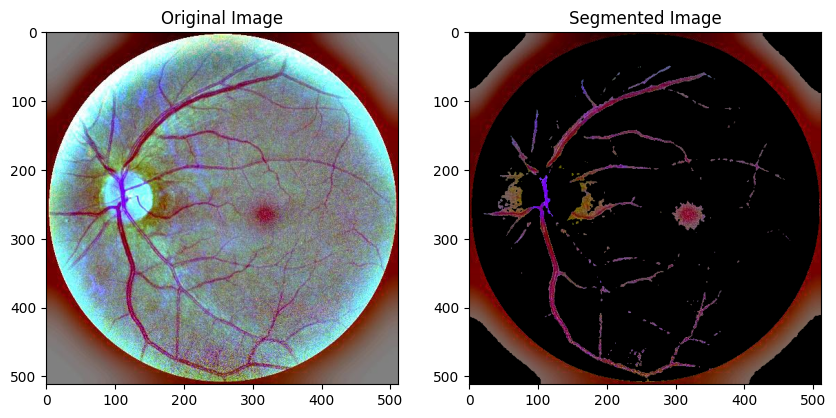

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
               Disease_Name         %
0                 Severe DR  0.254076
1               Moderate DR  0.224283
2                   Wet AMD  0.219750
3                   Mild DR  0.180828
4             Normal Fundus  0.043941
5            Proliferate DR  0.040513
6                   Dry AMD  0.025385
7  Hypertensive Retinopathy  0.011225
Heart risk detected: 53.01%


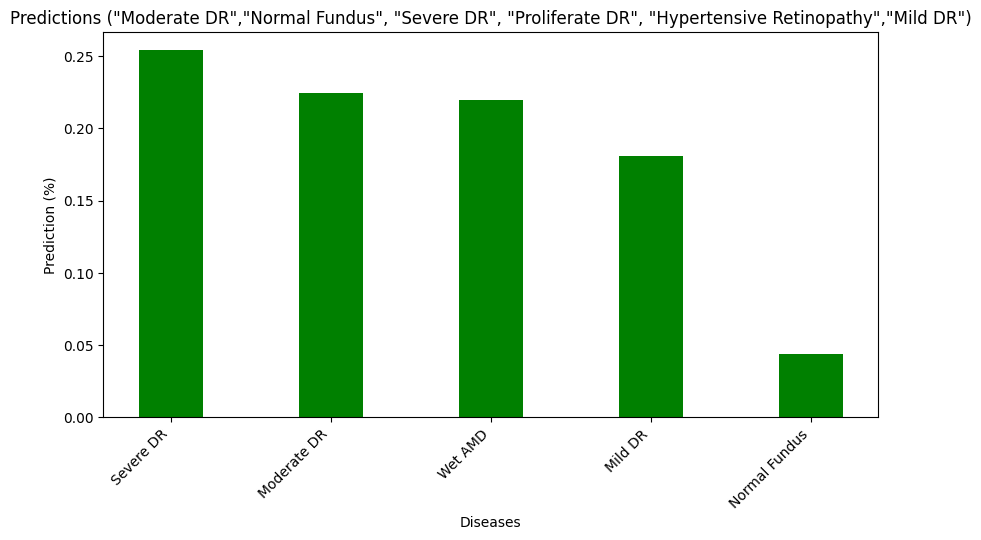

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from IPython.display import display
import ipywidgets as widgets

# Define a function to segment the image
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    segmented = cv2.bitwise_and(image, mask)
    return segmented

# Define a function to preprocess a single image
def preprocess_image(image):
    image = cv2.resize(image, (150, 150))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

image_path = '/kaggle/input/image112/4076_left.jpeg'  # Replace with your image file path
image = cv2.imread(image_path)
if image is not None:
    segmented_image = segment_image(image)
    
    # Display original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.show()

    preprocessed_image = preprocess_image(segmented_image)
    images = np.vstack([preprocessed_image])
    prediction_array = loaded_model.predict(images, batch_size=10)[0]

    # Define the classes
    classes = ["Dry AMD", "Normal Fundus", "Wet AMD", "Mild DR", "Moderate DR", "Severe DR", "Proliferate DR", "Hypertensive Retinopathy", "Pathological Myopia"]

    results = get_results(classes, prediction_array)

    # Save results to CSV
    header = ['Disease_Name', '%']
    with open('results.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        for result in results:
            writer.writerow(result)

    # Read results from CSV and print
    df = pd.read_csv('results.csv')
    print(df)

    # Define heart risk related diseases
    heart_risk_diseases = ["Moderate DR", "Severe DR", "Proliferate DR", "Hypertensive Retinopathy"]

    # Calculate heart risk percentage
    heart_risk_percentage = sum(df[df['Disease_Name'].isin(heart_risk_diseases)]['%']) * 100

    # Print heart risk
    if heart_risk_percentage > 0:
        print(f"Heart risk detected: {heart_risk_percentage:.2f}%")
   
    else:
        print("No heart risk")


    # Plot the top 5 predictions
    plt.figure(figsize=(10, 5))
    plt.bar([i[0] for i in results[:5]], [i[1] for i in results[:5]], color='green', width=0.4)
    plt.xlabel("Diseases")
    plt.ylabel("Prediction (%)")
    plt.title("Predictions (\"Moderate DR\",\"Normal Fundus\", \"Severe DR\", \"Proliferate DR\", \"Hypertensive Retinopathy\",\"Mild DR\")")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Error loading the image.")


